In [1]:
import pandas as pd
fund = pd.read_csv('PS_20174392719_1491204439457_log.csv')
print(fund.tail())

         step      type      amount     nameOrig  oldbalanceOrg  \
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
6362615               0  
6362616               0  
6362617               0  
636261

The dataset is being used to predict if a transaction which is happening may be a fraud. This is shown is the dataset by using column isFraud which has values either 0 or 1 for fraud and no fraud. So this means we will have two classes. In this dataset there are columns with string as values because of which we will have to pre-process it before running it through a prediction model. Other than this most of the attributes are of type float.

In [16]:
freq_type=fund.groupby('type')[['amount']].count()  ##frequency of transaction based on types
freq_type.columns=['frequency_of_types']
freq_type

,frequency_of_types
type,
CASH_IN,1399284
CASH_OUT,2237500
DEBIT,41432
PAYMENT,2151495
TRANSFER,532909


In the below plot we can see that majority of transaction are of type CASH_OUT and Payment with Debit being the least frequently used type

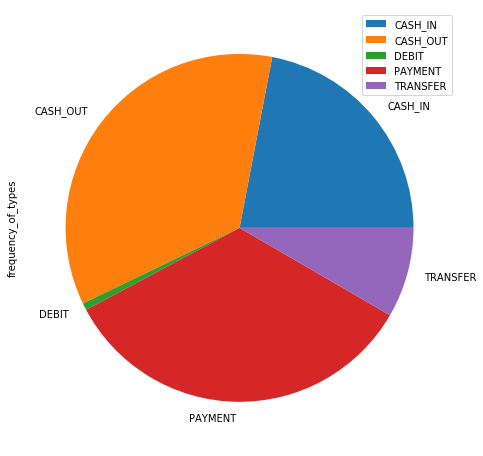

In [25]:
pie_plot=freq_type.plot.pie(y='frequency_of_types', figsize=(12, 8))
pie_plot.legend(loc="upper right")
pie_plot.figure.savefig("frequency_of_types.jpg")
## This plot shows the frequency with which each type of transaction is used

In [5]:
aot=fund.groupby('type')[['amount']].sum() ##amount of transaction in each type
aot.columns=['amount_of_transactions']
aot


,amount_of_transactions
type,
CASH_IN,2.363674e+11
CASH_OUT,3.944130e+11
DEBIT,2.271992e+08
PAYMENT,2.809337e+10
TRANSFER,4.852920e+11


In the below figure we can see that Transfer and Cash_out are responsible for most of the amount that is being
transfered. But since Cash_out was one of the major type of transaction that was beiing used it fits perfectly 
however in the above figure we saw the Transfer was one of the least used type but it carries the most amount of money therefore there is higher chance of fraud being committed. 

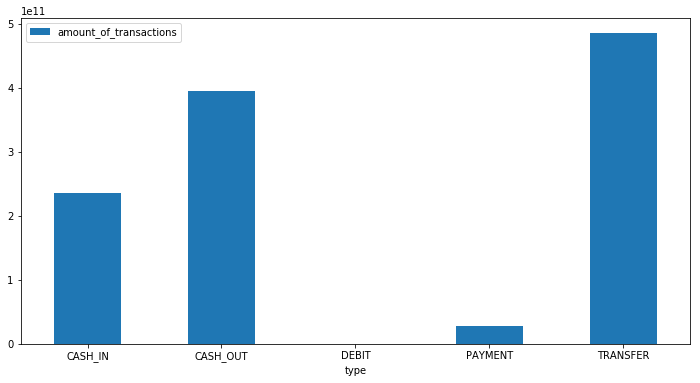

In [7]:
ax = aot.plot.bar(rot=0,figsize=(12,6))
ax
ax.figure.savefig("amount_of_transactions.jpg")

## This plot shows the amount of money involved in each transaction.

In [8]:
total_fraud_amount = fund[['amount']].where(fund['isFraud']==1,0).sum()
total_fraud_amount

amount    1.205642e+10
dtype: float64

In [9]:
total_legit_amount = fund[['amount']].where(fund['isFraud']==0,0).sum()
total_legit_amount

amount    1.132337e+12
dtype: float64

The below figure shows that the total amount of money involved in fraudulent transaction is very less as compared to the overall money involvedin the transaction.

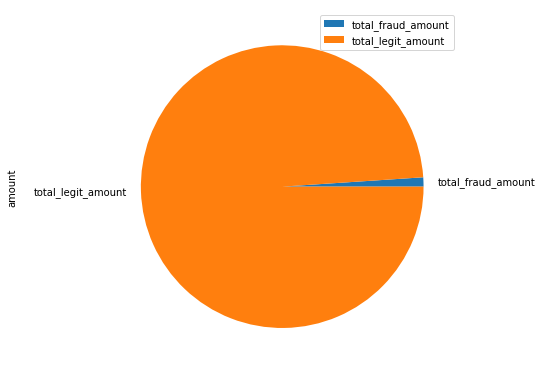

In [10]:
df={'total_fraud_amount':total_fraud_amount,'total_legit_amount':total_legit_amount}
df = pd.DataFrame(data=df)
df=df.T
df
pie_plot1=df.plot.pie(y='amount', figsize=(12,6.5))
pie_plot1.yaxis.set_label_coords(-0.25, 0.5)
pie_plot1.legend(loc="upper right")
pie_plot1.figure.savefig("fraud_vs_legit.jpg")


##This plot shows the difference between total fraud amount and legit amount.

The below figure shows that all the fraudulent transactions are happening in either Cash_out or Transfer types
of transaction. In the previous figures we also saw that cash_out and transfer were also responsible for 
majority of amount being present in the transactions. This shows a direct co-relation. Higher the amount 
being handled by transaction type higher the chances of fraud.

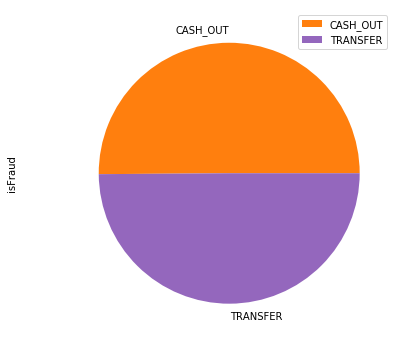

In [77]:
number_of_fraud = fund.groupby('type')[['isFraud']].sum() ##number of fraud in each transaction
number_of_fraud
pie_plot2=number_of_fraud.plot.pie(y='isFraud', figsize=(12,6))
pie_plot2.yaxis.set_label_coords(-0.15, 0.5)
pie_plot2.legend(loc="upper right")
pie_plot2.figure.savefig("types_with_fraud_transactions.jpg")

##this plot shows which type of transaction has max amount of fraud.

In [86]:
flagged_fraud = fund.groupby('type')[['isFlaggedFraud']].sum()## type with frequency of flagged
flagged_fraud

,isFlaggedFraud
type,
CASH_IN,0
CASH_OUT,0
DEBIT,0
PAYMENT,0
TRANSFER,16


In [87]:
flagged_real_ratio=pd.merge(flagged_fraud,number_of_fraud,how='right',left_on='type',right_on='type')
flagged_real_ratio

,isFlaggedFraud,isFraud
type,,
CASH_IN,0,0
CASH_OUT,0,4116
DEBIT,0,0
PAYMENT,0,0
TRANSFER,16,4097


The figure below shows that of all the fraudulent transactions only a fraction is being flagged as fraud and all of which are in the transfer type of transaction. By focusing on catching fraud in this two types the prevention of fraud can be greatly improved.

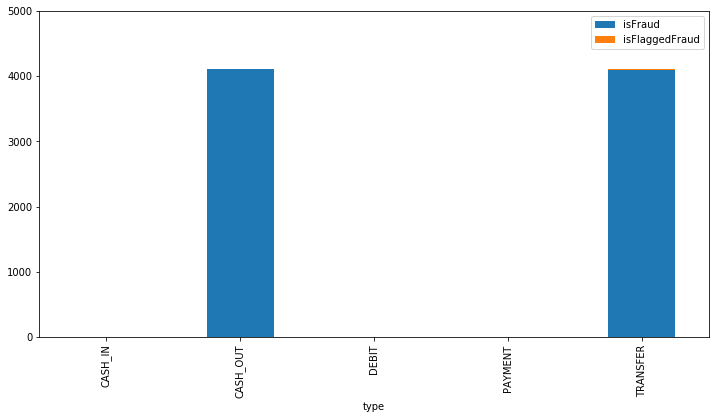

In [103]:
plot1 = flagged_real_ratio[["isFraud", "isFlaggedFraud"]].plot(kind="bar", stacked=True, figsize=(12,6),ylim=(0, 5000))
plot1
plot1.figure.savefig("fraud_vs_isFlagged.jpg")

## This plot shows that a very small amount of fraud is being flagged and that too only in transactions of type transfer.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
import collections, numpy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt    
import warnings
warnings.filterwarnings('ignore')




# Function to plot Confusion Matrix

In [5]:
def confusionMatrix(y_test,y_pred,modelName):
    labels = ['Fraud', 'Legit']
    cm = confusion_matrix(y_test, y_pred,normalize='true')
    print(cm)
    fig = plt.figure(figsize=(12,7))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(modelName)
    plt.show()

# Initial Pre-Processing of data

In [6]:
Y=fund['isFraud']# taking isFraud column as target values
X=fund.loc[:, fund.columns != 'isFraud'] # taking all columns from dataset except isFraud which is our target

# changing the type to numbers based on the type of transaction
X['type']=X['type'].replace({'CASH_IN':0,'CASH_OUT':1,'DEBIT':2,'PAYMENT':3,'TRANSFER':4})

# Removing String characters from column of the dataset
X['nameOrig']=X['nameOrig'].map(lambda x:x.lstrip('CM'))
X['nameDest']=X['nameDest'].map(lambda x:x.lstrip('CM'))


# using sklearn to split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


# Prediction using Naive Bayes Algorithm

In [7]:
#initializing the model
gnb = GaussianNB()

#providing data to fit
gnb.fit(X_train, y_train)

#predicting based on the test which we already have
y_pred = gnb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9920441579097918


Using the above classifier we are getting an accuracy of 99.28% this shows that our model is over-fitting. 
This prediction will work very nicely with the current dataset only and might give a very bad accuracy with 
other datasets. In order to solve this problem we need a greater number of fraud transactions in our datasets
along with more number of overall transactions in our dataset. Also the result can be further improved by 
making the number of transaction of each type similar or closer to each other thereby removing the bias caused
due to more number of particular type of transaction.

In [8]:
#number of 0 and 1's in the predicted result
collections.Counter(y_pred)

Counter({0: 1895274, 1: 13512})

In [9]:
#number of 0 and 1's in the given dataset
collections.Counter(y_test)

Counter({0: 1906322, 1: 2464})

The below confusion matrix shows that the classification model is able to correctly identify majority of the
fraudulent transactions as fraud but it is also classifying a lot of legit transactions as fraud which is not
correct. The amount of fraud being classified as legit and vice versa are on the lower end of spectrum.

[[0.99311921 0.00688079]
 [0.83969156 0.16030844]]


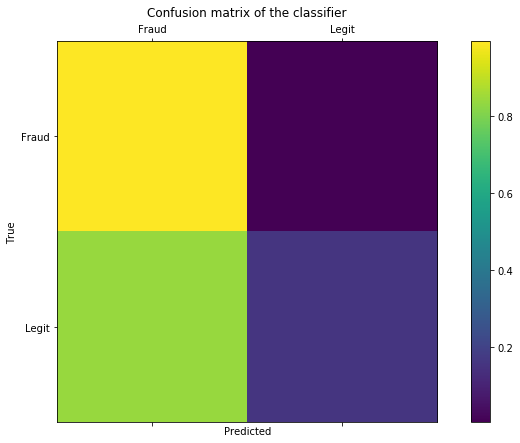

In [10]:
#plotting of confusion_matrix
confusionMatrix(y_test,y_pred,"naive_bayes.jpg")


# Prediction using Decision Tree Classifier 

In [11]:
#similar process as naive bayes done just with different algorithm which is decision tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9996730906450487


By using Decision tree we are getting even better accuracy then before which is 99.96 which makes it worse 
than naive bayes since it is more overfitted than before. We can take similar measures as above to improve the 
overfitting problem.

In [12]:
collections.Counter(y_pred)

Counter({0: 1906408, 1: 2378})

In [13]:
collections.Counter(y_test)

Counter({0: 1906322, 1: 2464})

In the below confusion matrix we can see that the majority of fraud and legit transactions are being classified
as they are also the classification of legit as fraud and vice versa is lower than that of naive bayes.

[[9.99858891e-01 1.41109424e-04]
 [1.44074675e-01 8.55925325e-01]]


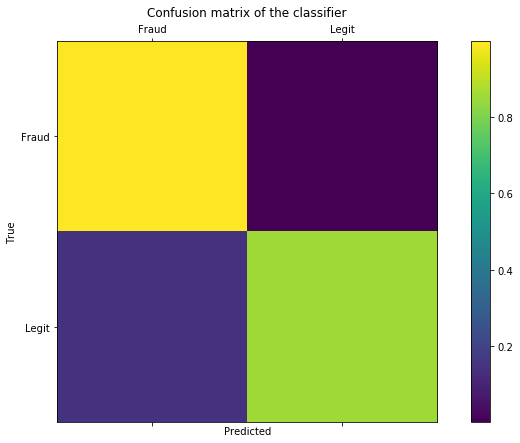

In [15]:
confusionMatrix(y_test,y_pred,"decision_tree.jpg")

We can further improve the prediction model by using Ensemble learning or ADA boost.
